

## READING THE DATA SET
use bit_data as the variable to read the data set from the link :bit_data =
https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv


In [8]:
import pandas as pd
bit_data = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')

hint!!!
use read_csv method

In [69]:
#answer, write code which is a solution for above question.
bit_data = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv')

2906

In [ ]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        if len(bit_data)==2906:
            return True
        else:
            return False

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

# Date :
In the given dataset the Date feature is in the form of string ,cannot be used be used to perform any kind of operations.so we need to  convert the Date format from String to TimeStamp format,now this date can be used for analysis(comparision,evaluating and ploting graphs).


In [9]:
#initial_code, the code written here will be shown to user, write here initial setup to help user get started.
print(type(bit_data.Date[0]))
bit_data.Date=pd.to_datetime(bit_data.Date)
print(type(bit_data.Date[0]))

<class 'str'>
<class 'pandas.tslib.Timestamp'>


hint !!!!
use to_datetime method from pandas to convert it.

In [72]:
#answer, write code which is a solution for above question.
print(type(bit_data.Date[0]))
bit_data.Date=pd.to_datetime(bit_data.Date)
print(type(bit_data.Date[0]))

In [77]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
           return True

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


# ##VISUALIZATION OF PRICE OVER TIME 

## Using pyplot of matplotlib module
                
 For plotting the graph, the pyplot function is used which is present in the matplotlib library.

This function takes two arguments(one value each for X-axis and Y-axis).and xlabel() and ylabel can be set accordingly.
We analysed the given data and from the dataset and found out how bitcoin price is varied with time.


### We analysed the given data and from the dataset and found out how bitcoin price is varied with time.


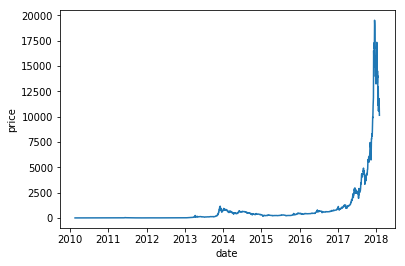

In [12]:
import matplotlib.pyplot as pt
bit_data.Date=pd.to_datetime(bit_data.Date)
pt.plot(bit_data.Date , bit_data.btc_market_price)
pt.xlabel("date")
pt.ylabel("price")

hint !!!!
use plot(x-axis,y-axis) function of pyplot class

In [ ]:
#answer, write code which is a solution for above question.
import matplotlib.pyplot as pt
bit_data.Date=pd.to_datetime(bit_data.Date)
pt.plot(bit_data.Date , bit_data.btc_market_price)
pt.xlabel("date")
pt.ylabel("price")

In [ ]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        return True
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

# AUTO REGRESSION (AR):

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

FINDING THE COEFFICIENTS OF THE TIME SERIES AR MODEL


In [17]:
from statsmodels.tsa.ar_model import AR


X = np.array(bit_data['btc_market_price'])

train, test = X[1:len(X)-180], X[len(X)-180:]#splitting the data into training and test data

model = AR(train) 
model_fit = model.fit() # training the model

width = model_fit.k_ar #window of the model
coef = model_fit.params
print(coef)

[-0.20681685  0.92003285  0.12429423 -0.11262735  0.01272796  0.05189717
 -0.00886826  0.01898414 -0.01676363  0.02134568 -0.03765369  0.16332236
 -0.09336268 -0.12166731  0.15140434 -0.0216068   0.05490947 -0.09073348
  0.0079032   0.0817336  -0.17445418 -0.07629082  0.21030934 -0.07272397
 -0.17525268  0.13900652  0.03999628  0.00843726]


In [ ]:
USE AR function to fit the model and then use params and k_ar 

In [ ]:
from statsmodels.tsa.ar_model import AR

X = np.array(bit_data['btc_market_price'])

train, test = X[1:len(X)-180], X[len(X)-180:]#splitting the data into training and test data

model = AR(train) 
model_fit = model.fit() # training the model

width = model_fit.k_ar #window of the model
coef = model_fit.params
print(coef)

In [ ]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        return True

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



# PREDICTING

FINDING THE PREDICTION OF THE LAST ONE YEAR FROM THE DATASET USING THE TRAINED MODEL ( AR MODEL )



In [13]:
coef = model_fit.params # returns the coefficient of the fit

prev = train[len(train)-width:]
prev = [prev[i] for i in range(len(prev))] # loading the training data set
predicts = list()

for t in range(len(test)): # calculating lag value 
    length = len(prev)
    lag = [prev[i] for i in range(length-width,length)]
    yhat = coef[0]
    for d in range(width):
        yhat += coef[d+1] * lag[width-d-1]
    obs = test[t]
    predicts.append(yhat)
    prev.append(obs)
print(predicts)

hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.

In [ ]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        return True

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



## COMPARISION OF ACTUAL AND PREDICTED VALUES FROM AR MODEL


calculating R-SQUARED value for AR:  0.757899880696


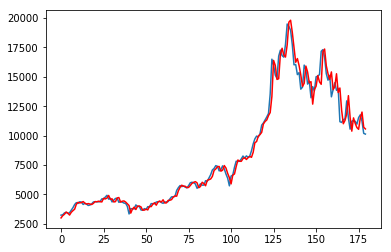

In [21]:
import statsmodels.formula.api as sm
#pt.subplots(figsize=(150,100), dpi=80,facecolor='w', edgecolor='k')
lm = sm.ols(formula ='btc_market_price ~  btc_avg_block_size  + btc_n_unique_addresses + btc_n_transactions_total+ btc_n_transactions_excluding_popular +btc_n_transactions_excluding_chains_longer_than_100 + btc_output_volume +btc_estimated_transaction_volume',data=bit_data).fit()
r=lm.rsquared
print ("calculating R-SQUARED value for AR: ",r)

pt.plot(test)
pt.plot(predicts, color='r')

pt.show()

hint, write any hint here for the above question.

In [ ]:
lm = sm.ols(formula ='btc_market_price ~  btc_avg_block_size  + btc_n_unique_addresses + btc_n_transactions_total+ btc_n_transactions_excluding_popular +btc_n_transactions_excluding_chains_longer_than_100 + btc_output_volume +btc_estimated_transaction_volume',data=bit_data).fit()
r=lm.rsquared
print ("calculating R-SQUARED value for AR: ",r)

pt.plot(test)
pt.plot(predicts, color='r')

pt.show()

In [ ]:
try:
    def verify_answer():
        return True

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

# MOVING AVERAGE:(MA)
Moving average is technique in times series analysis which predicts the values by calculating the averages for the given window elements.
This window size can be adjusted by the data scientist.
A window is a list of values which are used to calculate the average, after this window is slided right by one element and the average of that window of elements is calculated,like wise the average is  calculated for a particular set (for this Training data is taken).

A curve connecting all these averages gives the moving average.
This graph is taken as basis for the prediction of the test data values and a curve is drawn for the moving average of test data values.
Blue graph represents training data where as red represents prediction(test data in the below code).

From the graph we can observe that the predicted values are nearer to the values in the dataset




We trained our models by the dataset excluding the last 180 responses  which were these are used as test data


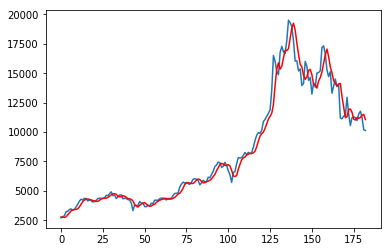

In [14]:
from numpy import mean
from sklearn.metrics import mean_squared_error

X = np.array(bit_data['btc_market_price'])

train, test = X[1:len(X)-180], X[len(X)-180:]#splitting the data into training and test data

window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]

predictions = list()
# walk forward over time steps in test


for t in range(len(test)):
    length = len(history)
    yhat= mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)



hint !!!!

In [ ]:
from numpy import mean
from sklearn.metrics import mean_squared_error

X = np.array(bit_data['btc_market_price'])

train, test = X[1:len(X)-180], X[len(X)-180:]#splitting the data into training and test data

window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]

predictions = list()
# walk forward over time steps in test


for t in range(len(test)):
    length = len(history)
    yhat= mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)


In [ ]:
#this is assertion block which verifies the solution.

try:
    def verify_answer():
        return True

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')


## COMPARISION OF ACTUAL AND PREDICTED VALUES FROM MA MODEL

R-squared is a value between 0 and 1.0 to measure how well the dependent variables are effectively modeling the target variable. The higher the value, the better that the dependent variables explain the fit.To increase the R-squared value and get better fit or predictions, the best way is to increase the number of independent variables (also called Feature Engineering)
Here the R squared value is 0.75 which indicates that using many independent variables we can effective predictions.



calculating R-SQUARED value for MA:  0.757899880696


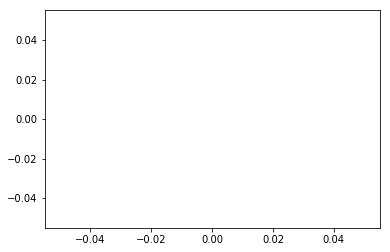

In [22]:
lm = sm.ols(formula ='btc_market_price ~  btc_avg_block_size  + btc_n_unique_addresses + btc_n_transactions_total+ btc_n_transactions_excluding_popular +btc_n_transactions_excluding_chains_longer_than_100 + btc_output_volume +btc_estimated_transaction_volume',data=bit_data).fit()
r=lm.rsquared
print ("calculating R-SQUARED value for MA: ",r)

pt.plot(test[2720:2906])
pt.plot(predictions[2720:2906], color='red')
pt.show()

hint, write any hint here for the above question.

In [ ]:
pt.plot(test[2720:2906])
pt.plot(predictions[2720:2906], color='red')
pt.show()

In [ ]:
try:
    def verify_answer():
           return True

    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

# ARIMA(Auto Regression Integrated Moving Average)

Time series is a non-stationarity form as the statistical values(like average ,mean,median ,variance ) do not converge to a stationary point ,because the values do not follow a particular trend . The best example for stationarity is the sine wave as the graph slides between -1 and 1 .

So arima can be used for the analysis of non stationarity data.
Ar and ma in arima is auto regression and moving average  which is already discussed above .
So what exactly is this arima ,it is 


We trained our models by the dataset excluding the last 180 responses  which were these are used as test data




R-squared is a value between 0 and 1.0 to measure how well the dependent variables are effectively modeling the target variable. The higher the value, the better that the dependent variables explain the fit.To increase the R-squared value and get better fit or predictions, the best way is to increase the number of independent variables (also called Feature Engineering)
Here the R squared value is 0.75 which indicates that using many independent variables we can effective predictions.


calculating R-SQUARED value :  0.757899880696


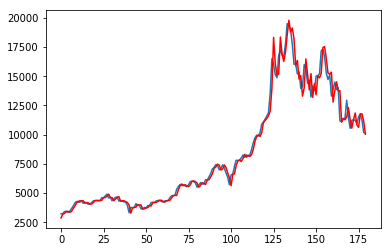

In [20]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm

bit_data = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv',header=0)
# split dataset
bit_data.Date=pd.to_datetime(bit_data.Date)
bit_data.index=bit_data.Date
X = np.array(bit_data['btc_market_price'])

train, test = X[1:len(X)-180], X[len(X)-180:]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    train=np.append(train,obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

lm = sm.ols(formula ='btc_market_price ~  btc_avg_block_size  + btc_n_unique_addresses + btc_n_transactions_total+ btc_n_transactions_excluding_popular +btc_n_transactions_excluding_chains_longer_than_100 + btc_output_volume +btc_estimated_transaction_volume',data=bit_data).fit()
r=lm.rsquared
print ("calculating R-SQUARED value for ARIMA: ",r)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.